<a href="https://colab.research.google.com/github/Gobihanath/User-Retention/blob/main/Notebooks/User_Retention1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,log_loss

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'19APC3970_DBMS_Class Assignment 1.zip'
 19APC3970-English.pdf
 19APC3970_FWT_QUIZ02.pdf
'19APC3970 HTML-01 (1).zip'
'19APC3970 HTML-01.zip'
'19APC3970 HTML _1.rar'
 19APC3970.LOG2.docx
 19APC3970.LOG.docx
 19APC3970_QUIZ02.pdf
 19APC3970-Quiz03.pdf
 20240216_091107.jpg
 20240216_091245.jpg
 20240216_091320.jpg
 20240216_095746.jpg
 20240216_170935.jpg
 Abstract
 Abstract.gdoc
 Artwork-Gobihanath
 Attendence1.jpg
'Author Declaration Form IRCFoT-2025_V2.docx'
'Balancing Academic and Non-Academic Workload: Stress Assessment .gform'
'Balancing Academic and Non-Academic Workload: Stress Assessment  (Responses).gsheet'
 Banana1.jpg
 Banana2.jpg
 BI-Report.gdoc
'CamScanner 08-26-2022 13.34.jpg'
'CamScanner 11-05-2021 11.58_1.pdf'
'CamScanner 11-05-2021 11.58.pdf'
'Capstone Project - Group 22'
 CIS
 Classroom
'Colab Notebooks'
'Community Doc.gdoc'
 Dataset
 Dialog
 Dialog_Mid_Script.pdf
'Doc1 { Easy come Easy go friend }.gdoc'
 Dtect_model1.h5
'DTECT Trained Models'

In [ ]:
%cd /content/gdrive/MyDrive/Dataset/User_Retention_Data

/content/gdrive/MyDrive/Dataset/User_Retention_Data


In [ ]:
df = pd.read_csv("XY_train.csv")

In [ ]:
test_df = pd.read_csv("X_test.csv")

In [ ]:
df

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Views,Subscribers,Impressions click-through rate (%)
0,2035.0,1578.0,97.95,0:09:32,4319500.0,3574.0,4.66
1,1070.0,1878.0,97.92,0:10:38,2522030.0,4845.0,5.14
2,1375.0,4314.0,97.54,0:09:31,3564849.0,8505.0,7.00
3,420.0,502.0,98.34,0:06:06,1148850.0,513.0,7.27
4,982.0,977.0,97.43,0:07:32,1559413.0,3865.0,5.08
...,...,...,...,...,...,...,...
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Shares,Comments added,Likes (vs. dislikes) (%),Views,Subscribers,Impressions click-through rate (%)
count,429.000000,429.000000,429.000000,4.290000e+02,429.000000,429.000000
mean,2972.510490,1814.564103,97.701166,3.463973e+06,8346.899767,5.590396
std,7274.326258,1622.438045,0.907702,3.222874e+06,12810.100013,1.112541
min,203.000000,187.000000,91.330000,1.033484e+06,341.000000,2.620000
25%,900.000000,755.000000,97.340000,1.563399e+06,2117.000000,4.870000
50%,1570.000000,1221.000000,97.880000,2.357541e+06,4216.000000,5.460000
75%,2763.000000,2336.000000,98.280000,3.982387e+06,8505.000000,6.230000
max,106414.000000,9109.000000,99.120000,2.803736e+07,120906.000000,10.420000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Shares                              429 non-null    float64
 1   Comments added                      429 non-null    float64
 2   Likes (vs. dislikes) (%)            429 non-null    float64
 3   Average view duration               429 non-null    object 
 4   Views                               429 non-null    float64
 5   Subscribers                         429 non-null    float64
 6   Impressions click-through rate (%)  429 non-null    float64
dtypes: float64(6), object(1)
memory usage: 27.2+ KB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Drop Missing Values
df.dropna(inplace=True)

# Function to convert 'HH:MM:SS' or 'MM:SS' to total seconds
# Function to convert 'HH:MM:SS' or 'MM:SS' to total seconds
def duration_to_seconds(duration):
    if isinstance(duration, str):  # Apply conversion only if it's a string
        parts = duration.split(':')
        if len(parts) == 3:  # Format: HH:MM:SS
            hours, minutes, seconds = map(int, parts)
            return hours * 3600 + minutes * 60 + seconds
        elif len(parts) == 2:  # Format: MM:SS
            minutes, seconds = map(int, parts)
            return minutes * 60 + seconds
    return duration  # If already numeric, return as is

# Apply function
df['Average view duration'] = df['Average view duration'].apply(duration_to_seconds)


# Drop rows with invalid durations (if any)
df.dropna(inplace=True)

# Define Features and Target
X = df[['Shares', 'Comments added', 'Likes (vs. dislikes) (%)',
        'Average view duration', 'Subscribers', 'Impressions click-through rate (%)']]
y = df['Views']

# Feature Scaling (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Model
model = LinearRegression()
model.fit(X_scaled, y)

# Predictions
y_pred = model.predict(X_scaled)

# Evaluate Model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Evaluate with Cross-Validation (5-Fold CV)
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean()}")


Mean Absolute Error (MAE): 823315.0991735533
Mean Squared Error (MSE): 1529078816283.394
Root Mean Squared Error (RMSE): 1236559.2651722739
R² Score: 0.8524440223066438
Cross-Validation R² Scores: [0.78229999 0.61131762 0.5767315  0.90426088 0.87654235]
Mean R² Score: 0.7502304699481317


### Model Development

Cross-Validation R² Scores: [0.76380789 0.59422951 0.64905223 0.83869838 0.83516749]
Mean R² Score: 0.7361910987539778
                              Feature  Importance
4                         Subscribers    0.850061
1                      Comments added    0.047195
3               Average view duration    0.031154
0                              Shares    0.029137
2            Likes (vs. dislikes) (%)    0.024393
5  Impressions click-through rate (%)    0.018060


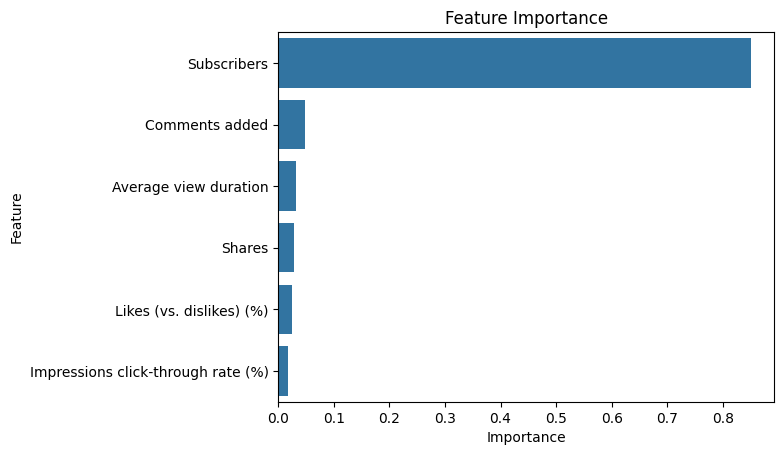

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score

# # Drop Missing Values
# df.dropna(inplace=True)

# # Function to convert 'HH:MM:SS' or 'MM:SS' to total seconds
# def duration_to_seconds(duration):
#     parts = duration.split(':')
#     if len(parts) == 3:  # Format: HH:MM:SS
#         hours, minutes, seconds = map(int, parts)
#         return hours * 3600 + minutes * 60 + seconds
#     elif len(parts) == 2:  # Format: MM:SS
#         minutes, seconds = map(int, parts)
#         return minutes * 60 + seconds
#     else:
#         return np.nan  # Handle unexpected formats

# # Convert "Average view duration" to seconds
# df['Average view duration'] = df['Average view duration'].apply(duration_to_seconds)

# # Drop rows with invalid durations (if any)
# df.dropna(inplace=True)

# # Define Features and Target
# X = df[['Shares', 'Comments added', 'Likes (vs. dislikes) (%)',
#         'Average view duration', 'Subscribers', 'Impressions click-through rate (%)']]
# y = df['Views']

# # Feature Scaling (if needed)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Train Model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_scaled, y)

# # Evaluate with Cross-Validation (5-Fold CV)
# cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
# print(f"Cross-Validation R² Scores: {cv_scores}")
# print(f"Mean R² Score: {cv_scores.mean()}")

# # Feature Importance
# importance = model.feature_importances_
# feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
# feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
# print(feature_importance)

# # Plot Feature Importance
# sns.barplot(x='Importance', y='Feature', data=feature_importance)
# plt.title('Feature Importance')
# plt.show()


In [ ]:
test_df

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%),Views prediction
0,27558,3243,95.66,00:11:10,28895,4.84,NaN
1,575,942,98.10,00:10:59,879,5.99,NaN
2,5362,1903,95.28,00:06:27,10362,5.98,NaN
3,1231,465,93.65,00:10:26,3119,5.35,NaN
4,4115,2126,97.16,00:13:42,10311,3.55,NaN
...,...,...,...,...,...,...,...
66,587,1895,98.66,00:07:08,4277,8.73,NaN
67,922,824,98.28,00:07:37,2621,4.74,NaN
68,1141,2196,97.93,00:12:46,5965,5.10,NaN
69,1292,576,98.39,00:09:58,939,5.76,NaN


In [ ]:
print(test_df.isna().sum())  # Check for missing values in each column


Shares                                 0
Comments added                         0
Likes (vs. dislikes) (%)               0
Average view duration                  0
Subscribers                            0
Impressions click-through rate (%)     0
Views prediction                      71
dtype: int64


In [ ]:
print(test_df["Average view duration"].head(10))


0    00:11:10
1    00:10:59
2    00:06:27
3    00:10:26
4    00:13:42
5    00:09:38
6    00:11:46
7    00:09:55
8    00:09:27
9    00:06:35
Name: Average view duration, dtype: object


In [ ]:
import re



test_df["Average view duration"] = test_df["Average view duration"].apply(duration_to_seconds)

# Print how many NaN values exist after conversion
print("NaN count after conversion:", test_df["Average view duration"].isna().sum())

# Drop only rows where "Average view duration" is missing
test_df = test_df.dropna(subset=["Average view duration"])

print("Shape after fixing duration conversion:", test_df.shape)


NaN count after conversion: 0
Shape after fixing duration conversion: (71, 7)


In [ ]:
test_df

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%),Views prediction
0,27558,3243,95.66,670,28895,4.84,NaN
1,575,942,98.10,659,879,5.99,NaN
2,5362,1903,95.28,387,10362,5.98,NaN
3,1231,465,93.65,626,3119,5.35,NaN
4,4115,2126,97.16,822,10311,3.55,NaN
...,...,...,...,...,...,...,...
66,587,1895,98.66,428,4277,8.73,NaN
67,922,824,98.28,457,2621,4.74,NaN
68,1141,2196,97.93,766,5965,5.10,NaN
69,1292,576,98.39,598,939,5.76,NaN


In [ ]:
import joblib
import pandas as pd

# Define feature columns (same as in training)
feature_cols = ["Shares", "Comments added", "Likes (vs. dislikes) (%)",
                "Average view duration", "Subscribers", "Impressions click-through rate (%)"]

# Ensure all required columns exist
missing_cols = [col for col in feature_cols if col not in test_df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in test_df: {missing_cols}")

# Select only the necessary features
X_test = test_df[feature_cols]

# Load the trained scaler (used during training)
scaler = joblib.load("scaler.pkl")
X_test_scaled = scaler.transform(X_test)  # Apply same scaling


# Make predictions
test_df["Views prediction"] = model.predict(X_test_scaled)


test_df["Views prediction"] = test_df["Views prediction"].round().astype(int)

# Display sample results
print(test_df[["Shares", "Comments added", "Views prediction"]].head())


# Save predictions if needed
test_df.to_csv("predicted_views.csv", index=False)

print("✅ Predictions saved to predicted_views.csv")



   Shares  Comments added  Views prediction
0   27558            3243           9118082
1     575             942           1716089
2    5362            1903           4328705
3    1231             465           2594615
4    4115            2126           3894347
✅ Predictions saved to predicted_views.csv


In [ ]:
test_df

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%),Views prediction
0,27558,3243,95.66,670,28895,4.84,9118082
1,575,942,98.10,659,879,5.99,1716089
2,5362,1903,95.28,387,10362,5.98,4328705
3,1231,465,93.65,626,3119,5.35,2594615
4,4115,2126,97.16,822,10311,3.55,3894347
...,...,...,...,...,...,...,...
66,587,1895,98.66,428,4277,8.73,2891952
67,922,824,98.28,457,2621,4.74,1696540
68,1141,2196,97.93,766,5965,5.10,3057376
69,1292,576,98.39,598,939,5.76,1526339
